<a href="https://colab.research.google.com/github/andrewmuhoro/MilkGrade/blob/main/Predict_Milk_Quality.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Introduction**

In this notebook, the goal is to predict the milk quality. The central goal is to design a model that makes proper classifications for new milk samples. In other words, one which exhibits good generalization. by seven observable milk variables

We can classify milk into three groups: low, medium, and high quality. The milk dataset contains 429 instances of low quality, 374 instances of medium quality, and 256 instances of high quality.

This dataset is manually collected from observations. It helps us to build machine learning models to predict the quality of milk. 
This dataset consists of 7 independent variables ie pH, Temperature, Taste, Odor, Fat, Turbidity, and Color:

1. pH: This feature defines pH of the milk, which is in the range of 3 to 9.5. 

2. Temperature: This feature defines the temperature of the milk, and its range is from 34'C to 90'C.

3. Taste: This feature defines the taste of the milk and takes the possibles values: 1 (good) or 0 (bad).

4. Odor: This feature defines the odor of the milk and takes the possibles values: 1 (good) or 0 (bad).

5. Fat: This feature defines fat of the milk and takes the possibles values: 1 (good) or 0 (bad).

6. Turbidity: This feature defines the turbidity of the milk and takes the possibles values: 1 (good) or 0 (bad).

7. Color: This feature defines the color of the milk, which is in the range of 240 to 255.

8. Grade: This is the target and takes the values: low_quality,medium_quality or high_quality.

# **Data Gathering**

In [1]:
# Install kaggle
# Kaggle will enable us to access and use data directly stored on the kaggle platform
!pip install -q kaggle
from google.colab import files
files.upload()


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"krightknight","key":"6cab6d6aa726ce1e4f24178009d1afae"}'}

In [2]:
# Upload your kaggle.json to colab environment
! mkdir ~/.kaggle

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [3]:
# remove any existing ~/.kaggle directory and 
# create a new one
# move your kaggle.json to ~/.kaggle
!rm -r ~/.kaggle
!mkdir ~/.kaggle
!mv ./kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [4]:
# List kaggle datasets
! kaggle datasets list 

ref                                                           title                                             size  lastUpdated          downloadCount  voteCount  usabilityRating  
------------------------------------------------------------  -----------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
salvatorerastelli/spotify-and-youtube                         Spotify and Youtube                                9MB  2023-03-20 15:43:25           3612        139  1.0              
ashishraut64/global-methane-emissions                         Global Emissions.                                 31KB  2023-03-27 09:02:51            927         30  1.0              
thitiwat/top-100-most-expensive-football-transfers            ⚽ Top 100 most expensive football transfers        2KB  2023-03-27 04:06:28            610         25  1.0              
davidms8/product-sales-detail                                 Product Sales - Detail 

In [5]:
# Download the dataset
!kaggle datasets download -d harinuu/milk-quality-prediction

milk-quality-prediction.zip: Skipping, found more recently modified local copy (use --force to force download)


In [6]:
# Unzip the downloaded dataset
!unzip milk-quality-prediction.zip

Archive:  milk-quality-prediction.zip
replace milknew.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: milknew.csv             


In [7]:
# List all files
!ls

milknew.csv  milk-quality-prediction.zip  sample_data


# **Data Exploration**

In [8]:
# Import necessary Libraries
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
import matplotlib.style as style
%matplotlib inline

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier

In [9]:
# Load data into a dataframe
data = pd.read_csv('milknew.csv')

In [10]:
# Check the top 5 rows
data.head()

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour,Grade
0,6.6,35,1,0,1,0,254,high
1,6.6,36,0,1,0,1,253,high
2,8.5,70,1,1,1,1,246,low
3,9.5,34,1,1,0,1,255,low
4,6.6,37,0,0,0,0,255,medium


In [11]:
# Check the last 5 rows
data.tail()

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour,Grade
1054,6.7,45,1,1,0,0,247,medium
1055,6.7,38,1,0,1,0,255,high
1056,3.0,40,1,1,1,1,255,low
1057,6.8,43,1,0,1,0,250,high
1058,8.6,55,0,1,1,1,255,low


In [12]:
# Check rows, columns count
data.shape

(1059, 8)

In [13]:
# Check column headers
data.keys()

Index(['pH', 'Temprature', 'Taste', 'Odor', 'Fat ', 'Turbidity', 'Colour',
       'Grade'],
      dtype='object')

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1059 entries, 0 to 1058
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   pH          1059 non-null   float64
 1   Temprature  1059 non-null   int64  
 2   Taste       1059 non-null   int64  
 3   Odor        1059 non-null   int64  
 4   Fat         1059 non-null   int64  
 5   Turbidity   1059 non-null   int64  
 6   Colour      1059 non-null   int64  
 7   Grade       1059 non-null   object 
dtypes: float64(1), int64(6), object(1)
memory usage: 66.3+ KB


In [15]:
# Get a summary of listed cols
data[['pH','Temprature','Taste']].describe()

,pH,Temprature,Taste
count,1059.000000,1059.000000,1059.000000
mean,6.630123,44.226629,0.546742
std,1.399679,10.098364,0.498046
min,3.000000,34.000000,0.000000
25%,6.500000,38.000000,0.000000
50%,6.700000,41.000000,1.000000
75%,6.800000,45.000000,1.000000
max,9.500000,90.000000,1.000000


In [16]:
# Check for null values
data.isnull().sum()

pH            0
Temprature    0
Taste         0
Odor          0
Fat           0
Turbidity     0
Colour        0
Grade         0
dtype: int64

In [17]:
# Check for duplicates
data.duplicated().sum()

976

> The dataset has no key, this maybe the reason why we are picking up so many duplicate records.

# **Data Cleaning**

In [18]:
# Rename columns
data = data.rename(columns={'Temprature':'Temperature'})

# **Data Visualization**

In [19]:
counts = data['Grade'].value_counts()
grade_percentages = [(count/len(data))*100 for count in counts]
grade_label = counts.index.tolist()

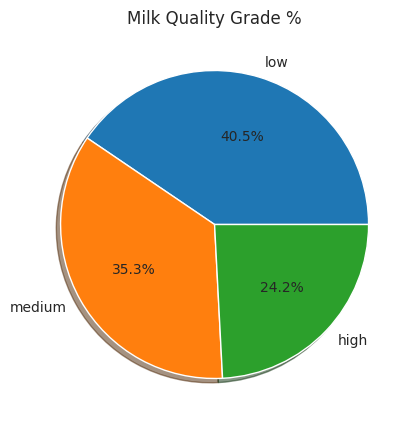

In [20]:
sb.set_style('dark')
plt.figure(figsize=(5,5))
plt.title('Milk Quality Grade %')
plt.pie(grade_percentages, labels=grade_label, autopct='%1.1f%%',shadow=True);

# **Train & Evaluate the Model**
Metrics such as accuracy, precision, and recall can be used measure the performance of the model.

In [21]:
# Create a copy of the original dataset
data_cp = data.copy()

In [22]:
# Split the dataset into features and target variable
X = data_cp.drop(['Grade'], axis=1)
y = data_cp['Grade']

In [23]:
# Preprocess the data
# Encode categorical variables
le = LabelEncoder()
X['Taste'] = le.fit_transform(X['Taste'])
X['Odor'] = le.fit_transform(X['Odor'])

In [24]:
print(X.columns)

Index(['pH', 'Temperature', 'Taste', 'Odor', 'Fat ', 'Turbidity', 'Colour'], dtype='object')


In [25]:
# Scale numerical variables
scaler = StandardScaler()
X[['pH', 'Temperature', 'Fat ', 'Turbidity', 'Colour']] = scaler.fit_transform(X[['pH', 'Temperature', 'Fat ', 'Turbidity', 'Colour']])

In [26]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [27]:
# Train and evaluate a support vector machine classifier
svm = SVC(kernel='linear')
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print("Accuracy of SVM classifier: {:.2f}%".format(accuracy_svm * 100))

Accuracy of SVM classifier: 83.49%


In [28]:
# Perform random classifier classification
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("Accuracy of Random Forest classifier: {:.2f}%".format(accuracy_rf * 100))

Accuracy of Random Forest classifier: 99.53%
